In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set(font="IPAexGothic",style="white")

import os
working_directory=os.getcwd()
print(working_directory)

/Users/naokimaruoka/Dropbox/00.Self-Dev/Programming/GitHub/Python


In [23]:
path_train=working_directory+'/train.csv'
path_test=working_directory+'/test.csv'
path_submit=working_directory+'/submit.csv'
train=pd.read_csv(path_train)
test=pd.read_csv(path_test)
submit=pd.read_csv(path_submit)

In [24]:
#インポートとデータ取得
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import numpy as np
# sns.set(font="IPAexGothic",style="white")
# sns.set(font="Meirio",style="white")

# train=pd.read_csv("/content/drive/MyDrive/data/titanic_train.csv")
# test=pd.read_csv("/content/drive/MyDrive/data/titanic_test.csv")

In [25]:
#データの確認
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,3,1,3,female,26.0,0,0,7.9250,S
2,4,1,1,female,35.0,1,0,53.1000,S
3,5,0,3,male,35.0,0,0,8.0500,S
4,7,0,1,male,54.0,0,0,51.8625,S


In [26]:
test.head()

,ID,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,female,38.0,1,0,71.2833,C
1,6,3,male,NaN,0,0,8.4583,Q
2,9,3,female,27.0,0,2,11.1333,S
3,11,3,female,4.0,1,1,16.7000,S
4,15,3,female,14.0,0,0,7.8542,S


In [27]:
#データの要約
train.describe(include="all")

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,668.000000,668.000000,668.000000,668,535.000000,668.000000,668.000000,668.000000,666
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,437,NaN,NaN,NaN,NaN,490
mean,445.911677,0.386228,2.305389,NaN,29.900000,0.534431,0.392216,32.373621,NaN
std,259.966783,0.487249,0.837377,NaN,14.487993,1.161739,0.822509,50.632021,NaN
min,1.000000,0.000000,1.000000,NaN,0.670000,0.000000,0.000000,0.000000,NaN
25%,216.250000,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,7.925000,NaN
50%,445.500000,0.000000,3.000000,NaN,29.000000,0.000000,0.000000,14.500000,NaN
75%,674.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.275000,NaN


In [28]:
test.describe(include="all")

,ID,pclass,sex,age,sibsp,parch,fare,embarked
count,223.000000,223.000000,223,179.000000,223.000000,223.000000,223.000000,223
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,140,NaN,NaN,NaN,NaN,154
mean,446.264574,2.318386,NaN,29.098715,0.488789,0.349776,31.696729,NaN
std,249.935932,0.833949,NaN,14.665346,0.904747,0.755513,46.875335,NaN
min,2.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,249.000000,2.000000,NaN,19.000000,0.000000,0.000000,7.895800,NaN
50%,448.000000,3.000000,NaN,26.000000,0.000000,0.000000,13.000000,NaN
75%,655.500000,3.000000,NaN,38.000000,1.000000,0.000000,30.000000,NaN


In [29]:
#欠損値の確認
train.isnull().sum()

ID            0
survived      0
pclass        0
sex           0
age         133
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [30]:
test.isnull().sum()

ID           0
pclass       0
sex          0
age         44
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64

# グラフ化して異常値や外れ値を確認しながら、Survivedに影響しそうな変数を探索




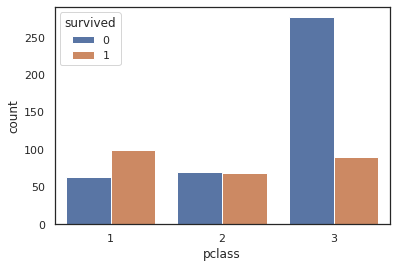

In [31]:
#Pclass
sns.countplot(x="pclass",hue="survived",data=train);

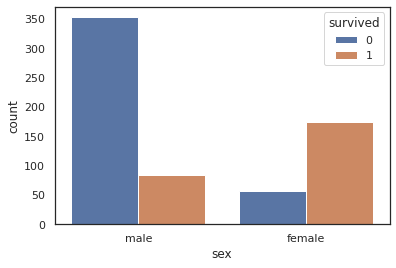

In [32]:
#Sex
sns.countplot(x="sex",hue="survived",data=train);
train["sex"]=train["sex"].apply(lambda x:1 if x=="female" else 0)
test["sex"]=test["sex"].apply(lambda x:1 if x=="female" else 0)

/Users/naokimaruoka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/naokimaruoka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


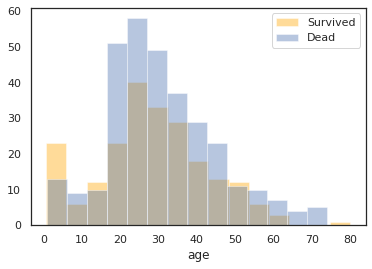

In [33]:
#Age
sns.distplot(train[train["survived"]==1]["age"],kde=False,label="Survived",color="orange")
sns.distplot(train[train["survived"]==0]["age"],kde=False,label="Dead",color="b")
plt.legend();

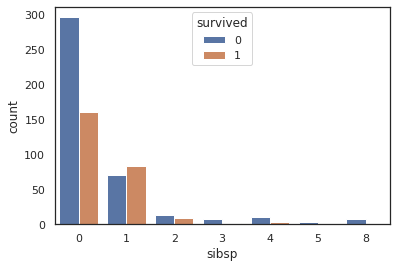

In [ ]:
#SibSp
sns.countplot(x="sibsp",hue="survived",data=train);

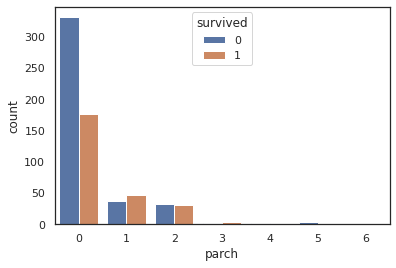

In [ ]:
#Parch
sns.countplot(x="parch",hue="survived",data=train);

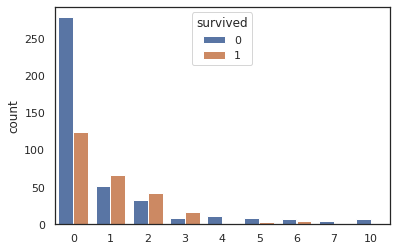

In [ ]:
#sibsp+parch
sns.countplot(x=train["sibsp"]+train["parch"],hue=train["survived"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


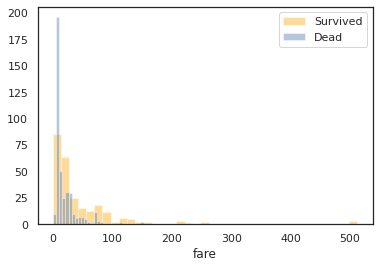

In [ ]:
#Fare
sns.distplot(train[train["survived"]==1]["fare"],kde=False,label="Survived",color="orange")
sns.distplot(train[train["survived"]==0]["fare"],kde=False,label="Dead",color="b")
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


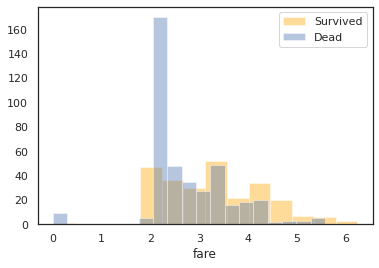

In [ ]:
#Fareを対数変換するとグラフの偏りが少なくなる
sns.distplot(np.log(train[train["survived"]==1]["fare"]+1),kde=False,label="Survived",color="orange")
sns.distplot(np.log(train[train["survived"]==0]["fare"]+1),kde=False,label="Dead",color="b")
plt.legend();
train["fare_log"]=np.log(train["fare"]+1)
test["fare_log"]=np.log(test["fare"]+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


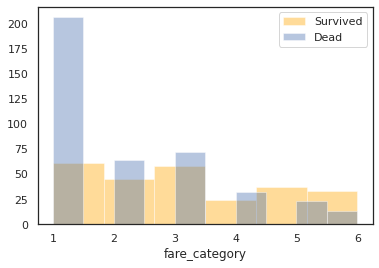

In [ ]:
#Fareをカテゴリー別に分けてみる
train["fare_category"]=pd.cut(x=train["fare_log"],bins=[-1,2.5,3,3.5,4,4.5,10],labels=[1,2,3,4,5,6])
test["fare_category"]=pd.cut(x=test["fare_log"],bins=[-1,2.5,3,3.5,4,4.5,10],labels=[1,2,3,4,5,6])
sns.distplot(train[train["survived"]==1]["fare_category"],kde=False,label="Survived",color="orange")
sns.distplot(train[train["survived"]==0]["fare_category"],kde=False,label="Dead",color="b")
plt.legend();

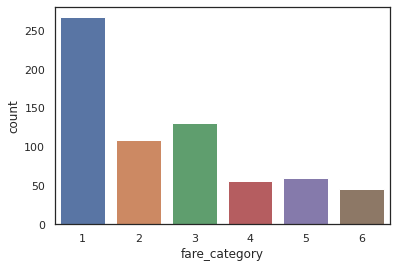

In [ ]:
sns.countplot(x="fare_category",data=train);

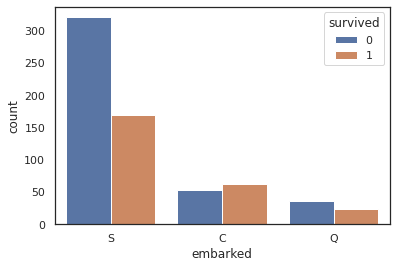

In [ ]:
#Embarked
sns.countplot(x="embarked",hue="survived",data=train);

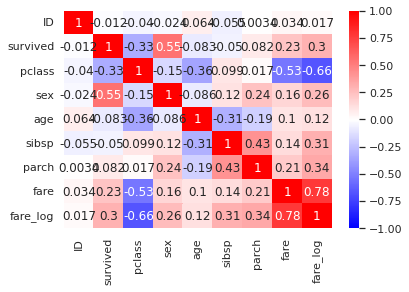

In [ ]:
sns.heatmap(train.corr(),cmap="bwr",annot=True,vmax=1,vmin=-1,center=0)


*  lightGBMはカテゴリーのLabel Encodingのみ実施
*  ロジスティックモデルは欠損値補完+カテゴリー変数のダミー変数化+Fareの対数変換などの処理が必要

In [ ]:
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked,fare_log,fare_category
0,1,0,3,0,22.0,1,0,7.2500,S,2.110213,1
1,3,1,3,1,26.0,0,0,7.9250,S,2.188856,1
2,4,1,1,1,35.0,1,0,53.1000,S,3.990834,4
3,5,0,3,0,35.0,0,0,8.0500,S,2.202765,1
4,7,0,1,0,54.0,0,0,51.8625,S,3.967694,4


#LightGBM実装

Training until validation scores don't improve for 100 rounds.
[50]	training's binary_logloss: 0.50759	valid_1's binary_logloss: 0.521555
[100]	training's binary_logloss: 0.432905	valid_1's binary_logloss: 0.465717
[150]	training's binary_logloss: 0.388662	valid_1's binary_logloss: 0.439657
[200]	training's binary_logloss: 0.355896	valid_1's binary_logloss: 0.426069
[250]	training's binary_logloss: 0.332387	valid_1's binary_logloss: 0.427675
[300]	training's binary_logloss: 0.313042	valid_1's binary_logloss: 0.433221
Early stopping, best iteration is:
[214]	training's binary_logloss: 0.348339	valid_1's binary_logloss: 0.425124
accuracy 0.8208955223880597


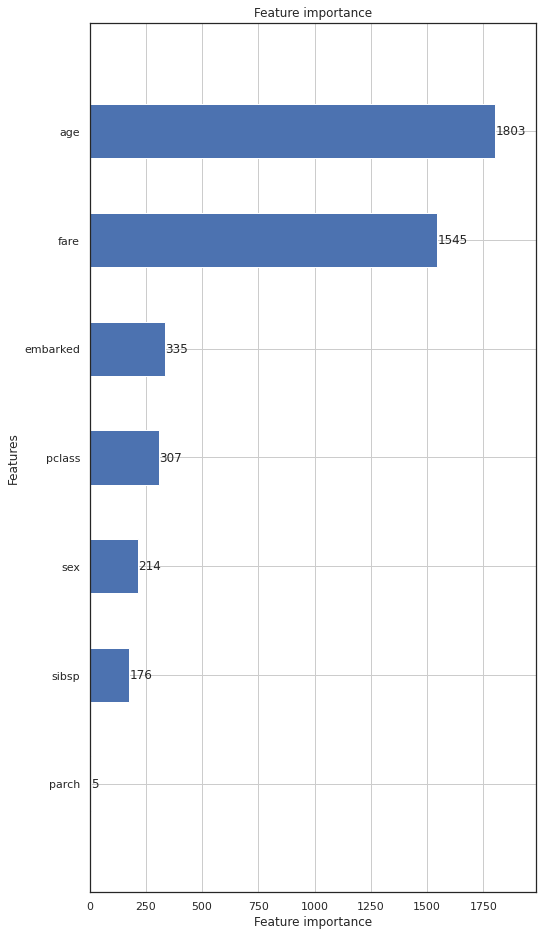

In [ ]:
#lightGBM実装
train_GBM=train.drop(["fare_log","fare_category"],1)
test_GBM=test.drop(["fare_log","fare_category"],1)
#label encoding
train_GBM["embarked"]=train_GBM["embarked"].fillna("unknown")
from sklearn.preprocessing import LabelEncoder
for i in train_GBM.columns:
  if train_GBM[i].dtypes==object:
    le=LabelEncoder()
    le.fit(train_GBM[i])
    train_GBM[i]=le.transform(train_GBM[i])
#lightGBM
X=train_GBM.drop(["ID","survived"],1)
y=train_GBM["survived"]
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
params={"objective":"binary","metrics":"binary_logloss","boosting_type": "gbdt","num_leaves":23,"learning_rate":0.01,"feature_fraction":1.0,"min_data_in_leaf":20}
model=lgb.train(params,lgb_train,valid_sets=[lgb_train,lgb_eval],num_boost_round=2000,early_stopping_rounds=100,verbose_eval=50)
y_pred = model.predict(X_val, num_iteration=model.best_iteration)
y_pred=np.where(y_pred>0.5,1,0)
print("accuracy",accuracy_score(y_val,y_pred))
lgb.plot_importance(model, height=0.5, figsize=(8,16))

In [ ]:
#予測値作成
df_submit=test_GBM.copy()
test_GBM=test_GBM.drop("ID",1)
test_GBM["embarked"]=test_GBM["embarked"].fillna("unknown")
from sklearn.preprocessing import LabelEncoder
for i in test_GBM.columns:
  if test_GBM[i].dtypes==object:
    le=LabelEncoder()
    le.fit(test_GBM[i])
    test_GBM[i]=le.transform(test_GBM[i])
test_GBM["survived"] = model.predict(test_GBM, num_iteration=model.best_iteration)
test_GBM["survived"]=test_GBM["survived"].apply(lambda x:1 if x>0.5 else 0)
display(test_GBM.head())
df_submit["y"]=test_GBM["survived"]
df_submit=df_submit[["ID","y"]]
df_submit.to_csv("titanic_submit.csv",index=False)

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,1,38.0,1,0,71.2833,0,1
1,3,0,NaN,0,0,8.4583,1,0
2,3,1,27.0,0,2,11.1333,2,1
3,3,1,4.0,1,1,16.7000,2,1
4,3,1,14.0,0,0,7.8542,2,1


#ロジスティック回帰モデル実装

In [ ]:
#データの再読み込み
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked,fare_log,fare_category
0,1,0,3,0,22.0,1,0,7.2500,S,2.110213,1
1,3,1,3,1,26.0,0,0,7.9250,S,2.188856,1
2,4,1,1,1,35.0,1,0,53.1000,S,3.990834,4
3,5,0,3,0,35.0,0,0,8.0500,S,2.202765,1
4,7,0,1,0,54.0,0,0,51.8625,S,3.967694,4


In [ ]:
#AgeとEmbarked欠損の方のの生存率
Age_null=train[train["age"].isnull()]
Embarked_null=train[train["embarked"].isnull()]
print("Age欠損",Age_null["survived"].mean())
print("Age有値",train.dropna(subset=["age"])["survived"].mean())
print("Embarked欠損",Embarked_null["survived"].mean())
print("Embarked有値",train.dropna(subset=["embarked"])["survived"].mean())

Age欠損 0.2932330827067669
Age有値 0.4093457943925234
Embarked欠損 1.0
Embarked有値 0.3843843843843844


In [ ]:
#前処理
train_lr=train.drop(["fare","fare_category"],1)
test_lr=test.drop(["fare","fare_category"],1)
#Age欠損値補完
train_lr["age"]=train_lr["age"].fillna(train_lr["age"].median())
test_lr["age"]=test_lr["age"].fillna(train_lr["age"].median())
#Embarkedの欠損は削除
train_lr=train_lr.dropna()
#Age<=6(小学生以下)を新しい変数に追加
train_lr["child"]=train_lr["age"].apply(lambda x:1 if x<=6 else 0)
test_lr["child"]=test_lr["age"].apply(lambda x:1 if x<=6 else 0)
#ParchとSibSpは0と1以上でダミー化
train_lr["parch"]=train_lr["parch"].apply(lambda x:1 if x>=1 else 0)
train_lr["sibsp"]=train_lr["sibsp"].apply(lambda x:1 if x>=1 else 0)
test_lr["parch"]=test_lr["parch"].apply(lambda x:1 if x>=1 else 0)
test_lr["sibsp"]=test_lr["sibsp"].apply(lambda x:1 if x>=1 else 0)
#Embarkedはダミー化
train_lr=pd.get_dummies(train_lr,columns=["embarked"],drop_first=True)
test_lr=pd.get_dummies(test_lr,columns=["embarked"],drop_first=True)
train_lr.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare_log,child,embarked_Q,embarked_S
0,1,0,3,0,22.0,1,0,2.110213,0,0,1
1,3,1,3,1,26.0,0,0,2.188856,0,0,1
2,4,1,1,1,35.0,1,0,3.990834,0,0,1
3,5,0,3,0,35.0,0,0,2.202765,0,0,1
4,7,0,1,0,54.0,0,0,3.967694,0,0,1


In [ ]:
#ロジスティックモデル構築
X=train_lr.drop(["ID","survived"],1)
y=train_lr["survived"]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
kf=KFold(n_splits=5,shuffle=True,random_state=1)
result=cross_val_score(lr,X,y,cv=kf);
print("accuracy=",result.mean())

accuracy= 0.7987431264728986


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#予測値作成
test_X=test_lr.drop("ID",1)
lr=LogisticRegression()
lr.fit(X,y)
test_lr["survived"]=lr.predict(test_X)
display(test_lr.head())
df_submit=test_lr[["ID","survived"]]
df_submit.columns=["ID","y"]
df_submit.to_csv("titanic_submit2.csv",index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,ID,pclass,sex,age,sibsp,parch,fare_log,child,embarked_Q,embarked_S,survived
0,2,1,1,38.0,1,0,4.280593,0,0,0,1
1,6,3,0,29.0,0,0,2.246893,0,1,0,0
2,9,3,1,27.0,0,1,2.495954,0,0,1,1
3,11,3,1,4.0,1,1,2.873565,1,0,1,1
4,15,3,1,14.0,0,0,2.180892,0,0,1,1


In [ ]:
#回帰係数
import statsmodels.api as sm
X=X
X2=sm.add_constant(X)
y=y
lr=sm.Logit(y,X2)
result=lr.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.449713
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  666
Model:                          Logit   Df Residuals:                      656
Method:                           MLE   Df Model:                            9
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                  0.3249
Time:                        12:02:05   Log-Likelihood:                -299.51
converged:                       True   LL-Null:                       -443.67
Covariance Type:            nonrobust   LLR p-value:                 7.817e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1997      0.923      2.383      0.017       0.390       4.009
pclass        -1.0765      0.182     -5.919      0.000      -1.433      -0.720
sex            2.7006      0.233     11.586      0.000       2.244       3.157
age           -0.0224      0.010     -2.226      0.026      -0.042      -0.003
sibsp         -0.1369      0.256     -0.535      0.593      -0.639       0.365
parch         -0.3109      0.302     -1.031      0.303      -0.902       0.280
fare_log      -0.0512      0.165     -0.310      0.757      -0.375       0.273
child          1.4177      0.552      2.566      0.010       0.335       2.500
embarked_Q    -0.1273      0.436     -0.292      0.770      -0.981       0.726
embarked_S    -0.5618      0.283     -1.985      0.047      -1.117      -0.007
==============================================================================
"""

In [ ]:
#オッズ比
np.exp(result.params)[1:]

pclass         0.340795
sex           14.888231
age            0.977809
sibsp          0.872046
parch          0.732760
fare_log       0.950092
child          4.127617
embarked_Q     0.880465
embarked_S     0.570177
dtype: float64

In [ ]:
#標準化回帰係数
import statsmodels.api as sm
X=(X-X.mean())/X.std()
X=X
X2=sm.add_constant(X)
y=y
lr=sm.Logit(y,X2)
result=lr.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.449713
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  666
Model:                          Logit   Df Residuals:                      656
Method:                           MLE   Df Model:                            9
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                  0.3249
Time:                        12:02:05   Log-Likelihood:                -299.51
converged:                       True   LL-Null:                       -443.67
Covariance Type:            nonrobust   LLR p-value:                 7.817e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6377      0.105     -6.102      0.000      -0.843      -0.433
pclass        -0.8995      0.152     -5.919      0.000      -1.197      -0.602
sex            1.2837      0.111     11.586      0.000       1.067       1.501
age           -0.2900      0.130     -2.226      0.026      -0.545      -0.035
sibsp         -0.0637      0.119     -0.535      0.593      -0.297       0.170
parch         -0.1332      0.129     -1.031      0.303      -0.387       0.120
fare_log      -0.0489      0.158     -0.310      0.757      -0.358       0.261
child          0.3291      0.128      2.566      0.010       0.078       0.580
embarked_Q    -0.0365      0.125     -0.292      0.770      -0.281       0.208
embarked_S    -0.2479      0.125     -1.985      0.047      -0.493      -0.003
==============================================================================
"""